# Introduction

Dataset Introduction
The dataset comprises employee demographic, performance, satisfaction, and organizational data, designed to support human resource analytics and workforce decision-making. It integrates information from multiple dimensions including personal characteristics (e.g., age, gender, education), job attributes (e.g., department, business travel, salary), performance reviews (e.g., manager and self-ratings), and satisfaction metrics (e.g., job, environment, relationship). Additionally, it captures employment dynamics such as tenure, promotions, and attrition status. The dataset is structured across several related tables — Employee, PerformanceRating, EducationLevel, RatingLevel, and SatisfiedLevel — enabling a multifaceted analysis of employee behavior and organizational outcomes. This comprehensive view is valuable for identifying drivers of attrition, assessing employee engagement, evaluating performance trends, and informing strategies for talent development and retention.

# **Import Libraries**

---





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving project (4).xlsx to project (4) (2).xlsx


In [ ]:
df_dict= pd.read_excel(r"project (4).xlsx", sheet_name=None)

In [ ]:
df=df_dict

# **Data collection and cleaning**

---



In [ ]:
df.keys()

dict_keys(['SatisfiedLevel', 'RatingLevel', 'EducationLevel', 'PerformanceRating', 'Employee'])

# Employee
This sheet contains core employee demographic and employment-related data. It includes attributes such as name, gender, age, department, distance from home, salary, marital status, stock options, overtime status, and attrition. It also tracks employment duration metrics like years at the company, time since last promotion, and years with the current manager. This sheet is essential for profiling the workforce and analyzing patterns in retention, diversity, and compensation.

In [ ]:
Employee_1=df['Employee']

In [ ]:
Employee_1.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [ ]:
Employee_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole                  1470 non-

In [ ]:
Employee_1.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
Employee_1.duplicated(subset=['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], keep='first').sum()

np.int64(0)

In [ ]:
Employee_1.isnull().sum()

,0
EmployeeID,0
FirstName,0
LastName,0
Gender,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome (KM),0
State,0
Ethnicity,0


In [ ]:
Employee_1.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,2017-07-05 14:50:26.938775296,4.562585,2.293197,3.440816,2.239456
min,18.000000,1.000000,1.000000,20387.000000,0.000000,2012-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2014-07-10 06:00:00,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,2017-09-02 00:00:00,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,2020-05-14 18:00:00,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,2022-12-31 00:00:00,10.000000,10.000000,10.000000,10.000000
std,7.993055,12.811124,1.024165,103342.889222,0.852077,NaN,3.288048,2.539093,2.945194,2.505774


# RatingLevel
This sheet maps numerical RatingID values to qualitative performance evaluation categories (e.g., Meets Expectation, Exceeds Expectation). It supports standardization of rating terminology across the organization and is used to interpret and visualize performance data in a meaningful way.

In [ ]:
RatingLevel_1=df ['RatingLevel']

In [ ]:
RatingLevel_1.head()

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [ ]:
RatingLevel_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [ ]:
RatingLevel_1.columns

Index(['RatingID', 'RatingLevel'], dtype='object')

In [ ]:
RatingLevel_1.duplicated(subset=['RatingID', 'RatingLevel'], keep='first').sum()

np.int64(0)

In [ ]:
RatingLevel_1.isnull().sum()

,0
RatingID,0
RatingLevel,0


In [ ]:
RatingLevel_1.describe()

,RatingID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# PerformanceRating
This sheet captures employee performance evaluations and engagement indicators. It includes self and manager ratings, review dates, and satisfaction scores across work environment, job role, and workplace relationships. It also records training opportunities and participation levels, making it valuable for analyzing performance trends, identifying training gaps, and correlating satisfaction with productivity.



In [ ]:
PerformanceRating_1=df ['PerformanceRating']

In [ ]:
PerformanceRating_1.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,01/02/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,01/03/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,01/03/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,01/04/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,01/04/2013,5,2,3,1,0,4,4,3


In [ ]:
PerformanceRating_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [ ]:
PerformanceRating_1.columns

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],
      dtype='object')

In [ ]:
PerformanceRating_1.duplicated(subset=['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],keep='first').sum()

np.int64(0)

In [ ]:
PerformanceRating_1.isnull().sum()

,0
PerformanceID,0
EmployeeID,0
ReviewDate,0
EnvironmentSatisfaction,0
JobSatisfaction,0
RelationshipSatisfaction,0
TrainingOpportunitiesWithinYear,0
TrainingOpportunitiesTaken,0
WorkLifeBalance,0
SelfRating,0


In [ ]:
PerformanceRating_1.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


# EducationLevel
This lookup table defines the education level categories associated with employees. It maps EducationLevelID to descriptive labels (e.g., High School, Bachelors, Masters). It is used to standardize and interpret the educational background data in the employee records and enables analysis of the impact of education on performance, compensation, and attrition.

In [ ]:
EducationLevel_1=df ['EducationLevel']

In [ ]:
EducationLevel_1.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [ ]:
EducationLevel_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [ ]:
EducationLevel_1.isnull().sum()

,0
EducationLevelID,0
EducationLevel,0


In [ ]:
EducationLevel_1.columns

Index(['EducationLevelID', 'EducationLevel'], dtype='object')

In [ ]:
EducationLevel_1.duplicated(subset=['EducationLevelID', 'EducationLevel'],keep="first").sum()

np.int64(0)

In [ ]:
EducationLevel_1.describe()

,EducationLevelID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# SatisfiedLevel
This sheet provides a mapping between SatisfactionID and descriptive levels of satisfaction (e.g., Very Dissatisfied to Very Satisfied). It allows for consistent interpretation of satisfaction-related fields across the dataset and supports analysis of workforce engagement and morale.


In [ ]:
SatisfiedLevel_1=df["SatisfiedLevel"]

In [ ]:
SatisfiedLevel_1.head()

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [ ]:
SatisfiedLevel_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [ ]:
SatisfiedLevel_1.isnull().sum()

,0
SatisfactionID,0
SatisfactionLevel,0


In [ ]:
SatisfiedLevel_1.columns

Index(['SatisfactionID', 'SatisfactionLevel'], dtype='object')

In [ ]:
SatisfiedLevel_1.duplicated(subset=['SatisfactionID','SatisfactionLevel'],keep="first").sum()

np.int64(0)

In [ ]:
SatisfiedLevel_1.describe()

,SatisfactionID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# Dataset Column Descriptions

| Column Name                    | Description                                                                 |
|-------------------------------|-----------------------------------------------------------------------------|
| **SatisfactionID**            | Unique identifier for satisfaction level                                   |
| **SatisfactionLevel**         | Description of the employee's overall satisfaction level                   |
| **RatingID**                  | Unique identifier for rating level                                         |
| **RatingLevel**               | Description of the employee's performance rating                           |
| **EducationLevelID**          | Unique identifier for education level                                      |
| **EducationLevel**            | Highest education qualification attained by the employee                   |
| **PerformanceID**             | Unique identifier for the performance review                               |
| **EmployeeID**                | Unique identifier for each employee                                        |
| **ReviewDate**                | Date of the performance review                                             |
| **EnvironmentSatisfaction**   | Employee's satisfaction with the work environment (scale 1–5)              |
| **JobSatisfaction**           | Employee's satisfaction with their job role (scale 1–5)                    |
| **RelationshipSatisfaction**  | Employee's satisfaction with colleague/manager relationships (scale 1–5)   |
| **TrainingOpportunitiesWithinYear** | Number of training opportunities available in the current year         |
| **TrainingOpportunitiesTaken**| Number of training opportunities the employee has taken                    |
| **WorkLifeBalance**           | Employee's perception of their work-life balance (scale 1–5)               |
| **SelfRating**                | Employee's self-assessment score                                           |
| **ManagerRating**             | Manager's assessment score of the employee                                 |
| **FirstName**                 | Employee's first name                                                      |
| **LastName**                  | Employee's last name                                                       |
| **Gender**                    | Gender identity of the employee                                            |
| **Age**                       | Age of the employee                                                        |
| **BusinessTravel**            | Employee's business travel frequency                                       |
| **Department**                | Department in which the employee works                                     |
| **DistanceFromHome (KM)**     | Distance between employee's residence and workplace in kilometers          |
| **State**                     | State of employment                                                        |
| **Ethnicity**                 | Ethnic background of the employee                                          |
| **MaritalStatus**             | Marital status of the employee                                             |
| **Salary**                    | Annual salary of the employee in USD                                       |
| **StockOptionLevel**          | Stock options provided to the employee (ordinal level)                     |
| **OverTime**                  | Whether the employee works overtime (Yes/No)                               |
| **HireDate**                  | Date the employee was hired                                                |
| **Attrition**                 | Whether the employee has left the company (Yes/No)                         |
| **YearsAtCompany**            | Total years the employee has worked at the company                         |
| **YearsInMostRecentRole**     | Years the employee has spent in their most recent role                     |
| **YearsSinceLastPromotion**   | Years since the employee's last promotion                                  |
| **YearsWithCurrManager**      | Years the employee has worked with their current manager                   |



# **Data Visualization**

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df_dict = pd.read_excel(r"project (4).xlsx", sheet_name=None)
df = df_dict

for sheet_name, sheet_df in df.items():
  print(f"Columns in sheet '{sheet_name}':")
  print(sheet_df.columns)
  print("-" * 20)

Saving project (4).xlsx to project (4) (1).xlsx
Columns in sheet 'SatisfiedLevel':
Index(['SatisfactionID', 'SatisfactionLevel'], dtype='object')
--------------------
Columns in sheet 'RatingLevel':
Index(['RatingID', 'RatingLevel'], dtype='object')
--------------------
Columns in sheet 'EducationLevel':
Index(['EducationLevelID', 'EducationLevel'], dtype='object')
--------------------
Columns in sheet 'PerformanceRating':
Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],
      dtype='object')
--------------------
Columns in sheet 'Employee':
Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'Stock

# **Ethnicity by Employees**

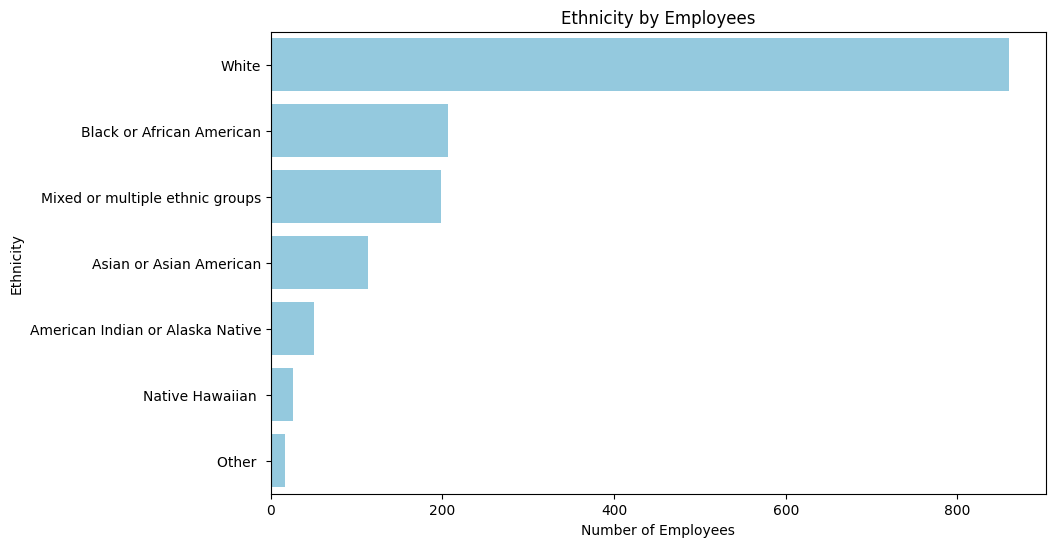

In [ ]:
Ethnicity_by_employees =Employee_1["Ethnicity"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=Ethnicity_by_employees.index, x=Ethnicity_by_employees.values,color="skyblue")
plt.title('Ethnicity by Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Ethnicity')
plt.show()

 "Number of employees belonging to each ethnicity".

# **What is the average number of training opportunities taken in each department ?**

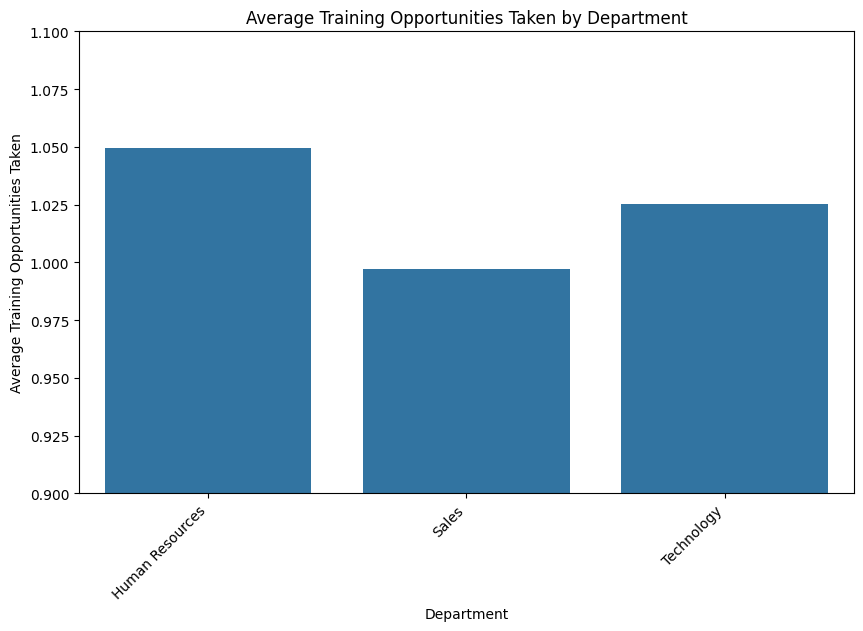

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PerformanceRating_1 = df['PerformanceRating']
Employee_1 = df['Employee']

merged_df = pd.merge(PerformanceRating_1, Employee_1[['EmployeeID', 'Department']], on='EmployeeID', how='left')

avg_training_by_dept = merged_df.groupby('Department')['TrainingOpportunitiesTaken'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_training_by_dept.index, y=avg_training_by_dept.values)
plt.title('Average Training Opportunities Taken by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Opportunities Taken')
plt.xticks(rotation=45, ha='right')

plt.ylim(0.9, 1.1)

plt.show()

`The chart shows the average number of training opportunities taken by employees in each department, all averages are very close to 1.`

# **Count Employees by JobRole**

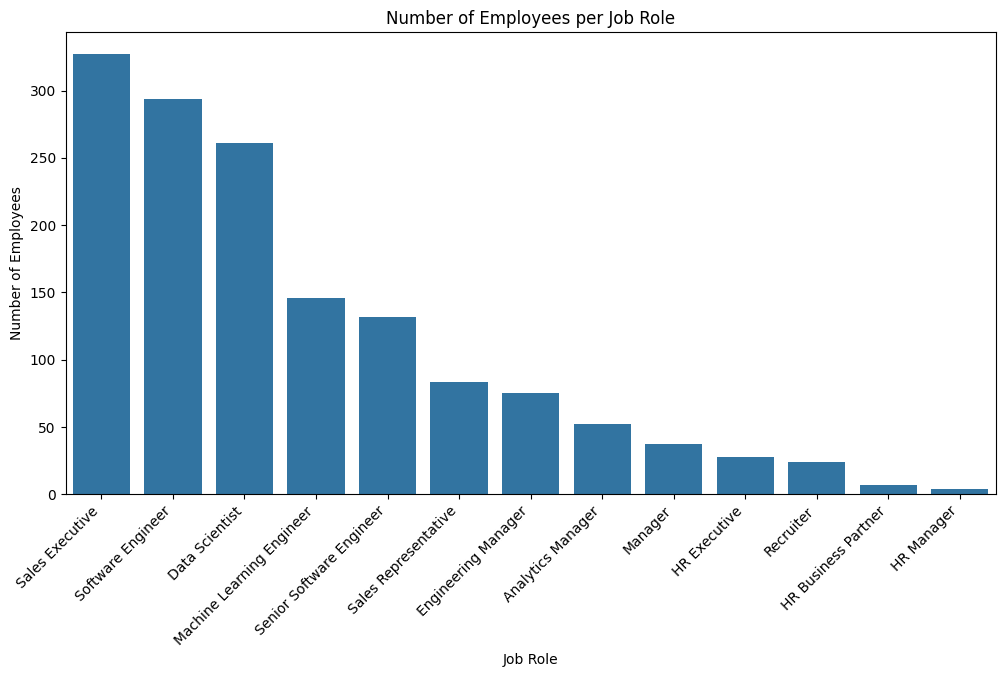

In [ ]:
import matplotlib.pyplot as plt
# Count employees by JobRole
jobrole_counts = Employee_1['JobRole'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=jobrole_counts.index, y=jobrole_counts.values)
plt.title('Number of Employees per Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()

`The bar chart displays the number of employees in each job role.`


# **How does the level of education affect salary?**

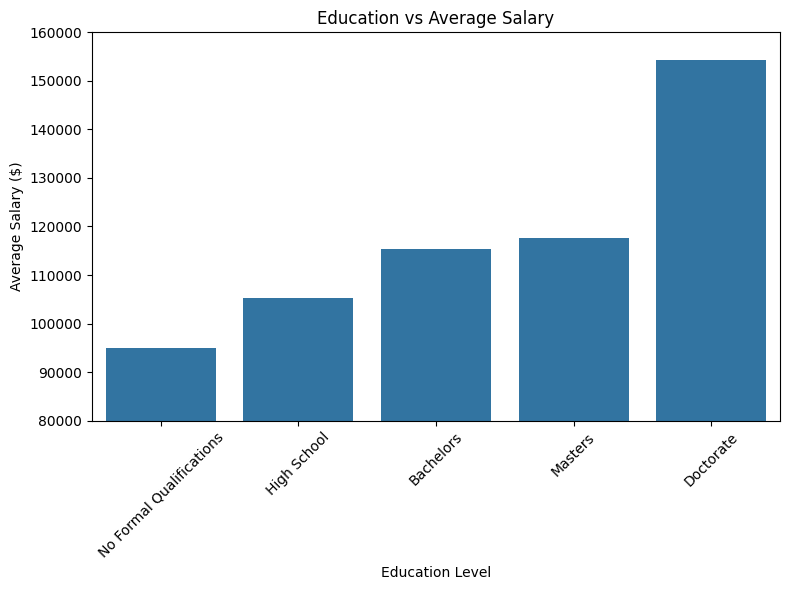

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by education level
education_salary = Employee_1.groupby('Education')['Salary'].mean().reset_index()

education_mapping = {
    1: 'No Formal Qualifications',
    2: 'High School',
    3: 'Bachelors',
    4: 'Masters',
    5: 'Doctorate'
}

education_salary['Education'] = education_salary['Education'].map(education_mapping)

plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Salary', data=education_salary)
plt.title('Education vs Average Salary')
plt.xlabel('Education Level')
plt.ylabel('Average Salary ($)')
plt.ylim(80000, 160000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 `Higher levels of education correlate with higher average salaries.`

<Figure size 1000x600 with 0 Axes>

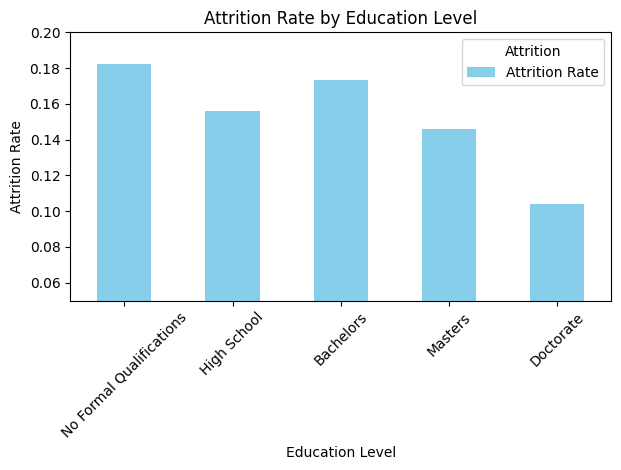

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate attrition rate by education level
attrition_rate = Employee_1.groupby('Education')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate = attrition_rate.rename(columns={'No': 'Retention Rate', 'Yes': 'Attrition Rate'})

# Map education levels to descriptions
education_mapping = {
    1: 'No Formal Qualifications',
    2: 'High School',
    3: 'Bachelors',
    4: 'Masters',
    5: 'Doctorate'
}
attrition_rate.index = attrition_rate.index.map(education_mapping)

# Create the plot
plt.figure(figsize=(10, 6))
attrition_rate[['Attrition Rate']].plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0.05, 0.2)
plt.show()


Attrition rates are shown for each education level.








<Figure size 1000x600 with 0 Axes>

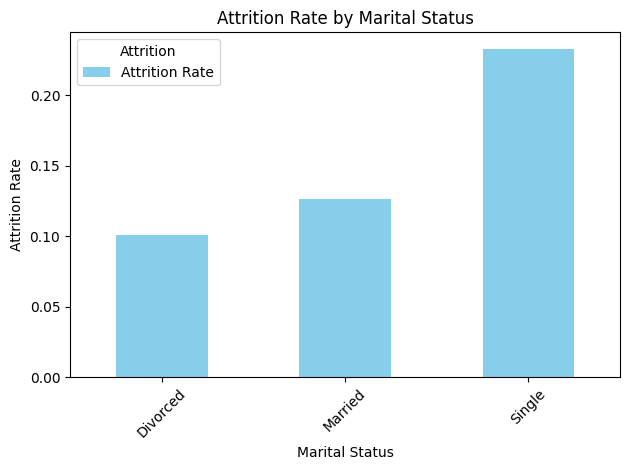

In [ ]:
import matplotlib.pyplot as plt
# Calculate attrition rate by marital status
attrition_rate = Employee_1.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate = attrition_rate.rename(columns={'No': 'Retention Rate', 'Yes': 'Attrition Rate'})

# Create the plot
plt.figure(figsize=(10, 6))
attrition_rate[['Attrition Rate']].plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Attrition rates vary across marital statuses.

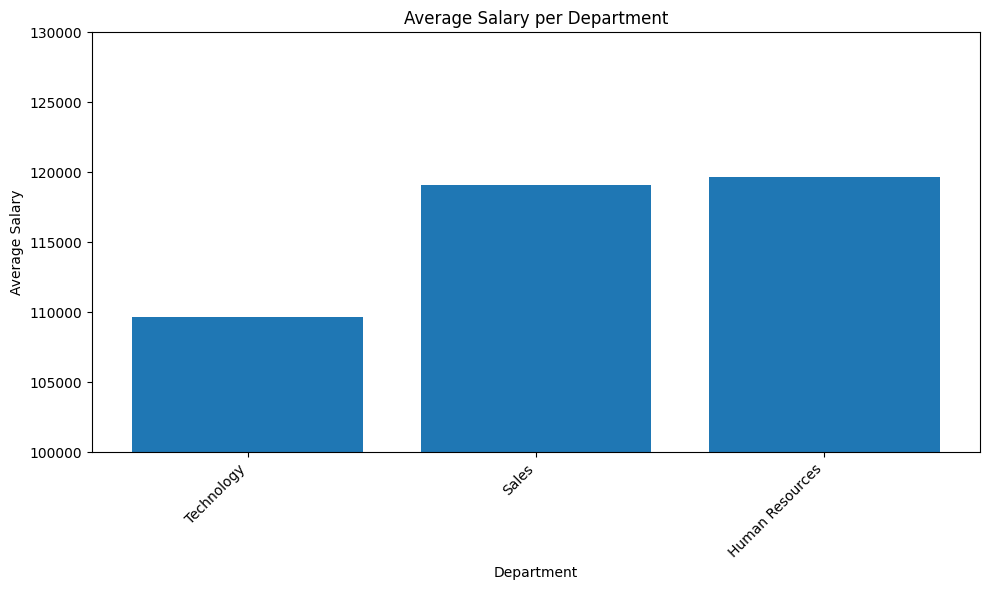

In [ ]:
import matplotlib.pyplot as plt

avg_salary_dept = Employee_1.groupby('Department')['Salary'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(avg_salary_dept.index, avg_salary_dept.values)

plt.title('Average Salary per Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(100000, 130000)
plt.show()


The chart shows the average salary for each department, ranging from approximately 100,000 to 130,000

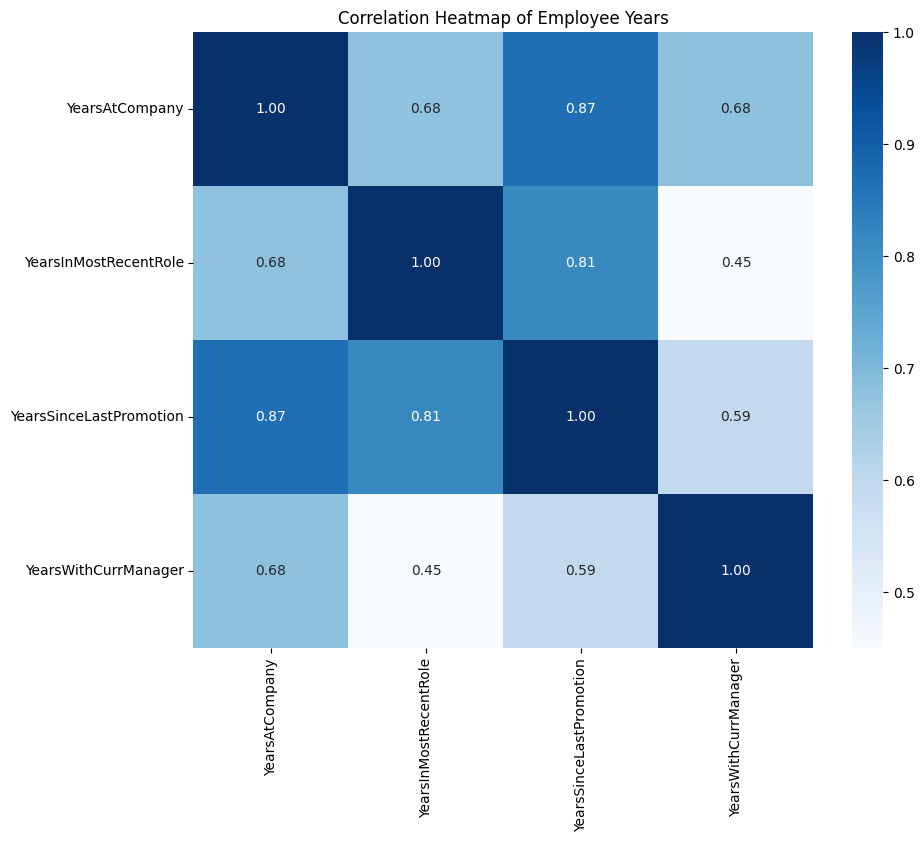

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(Employee_1[['YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].corr(),
            annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Employee Years')
plt.show()


 The heatmap shows the correlation between years at the company, years in the most recent role, years since last promotion, and years with the current manager.
 Strong positive correlations are observed between these variables,
 indicating that employees who have been with the company longer tend to have also spent more time in their current roles, with their current managers, and since their last promotion.
 This suggests a potential relationship between tenure and career progression within the company

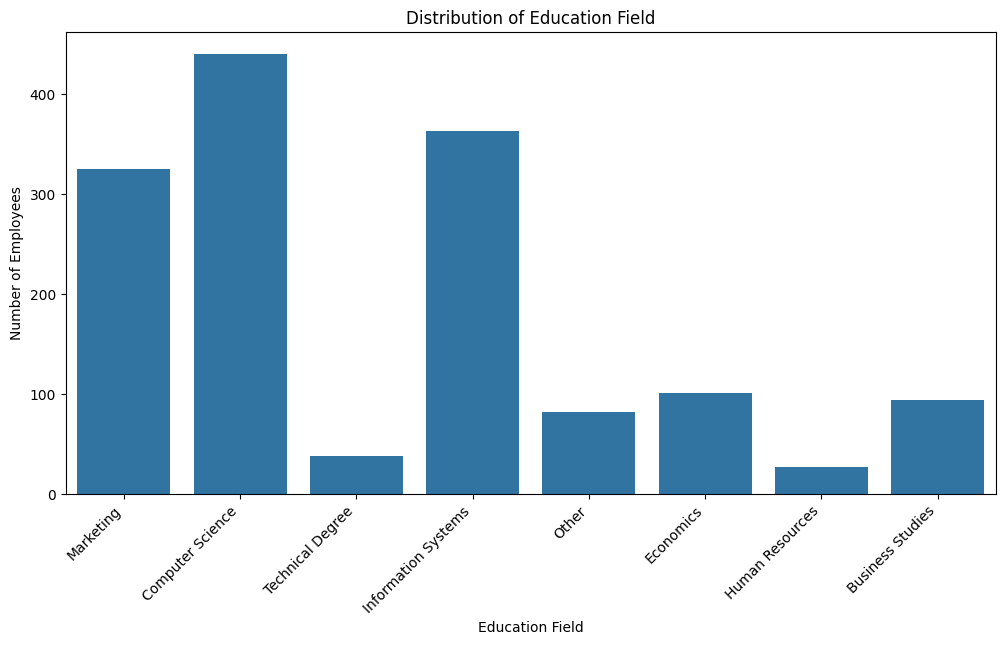

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Employee_1['EducationField'] = Employee_1['EducationField'].str.strip()

plt.figure(figsize=(12, 6))
sns.countplot(x='EducationField', data=Employee_1)
plt.title('Distribution of Education Field')
plt.xlabel('Education Field')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()



The chart shows the number of employees in each education field.

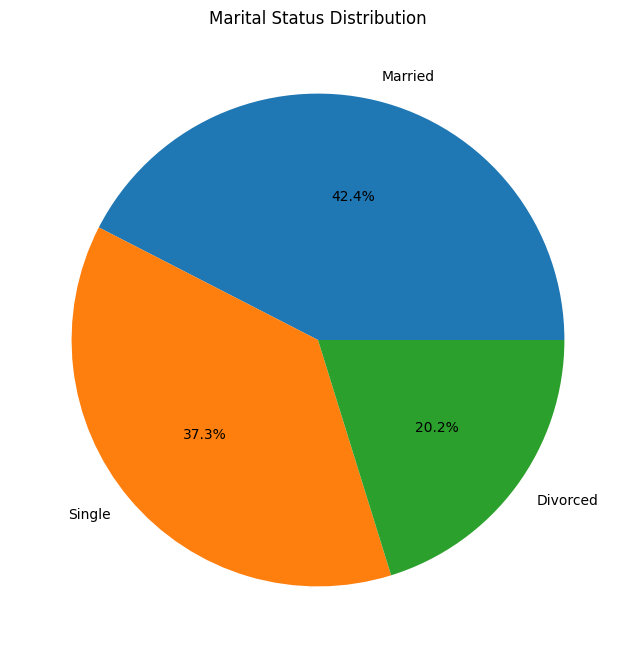

In [ ]:
import matplotlib.pyplot as plt
# Marital Status Distribution
plt.figure(figsize=(8, 8))
Employee_1['MaritalStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()


The marital status of employees is distributed as follows:
Married: 46.7%
Single: 32.4%
Divorced: 20.9%

<Figure size 1000x600 with 0 Axes>

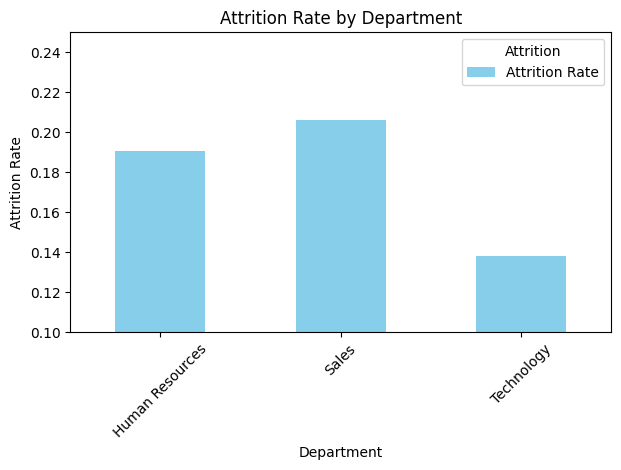

In [ ]:
import matplotlib.pyplot as plt
# Calculate attrition rate by department
attrition_rate = Employee_1.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate = attrition_rate.rename(columns={'No': 'Retention Rate', 'Yes': 'Attrition Rate'})

# Create the plot
plt.figure(figsize=(10, 6))
attrition_rate[['Attrition Rate']].plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0.1, 0.25)
plt.show()


Attrition rates differ across departments.

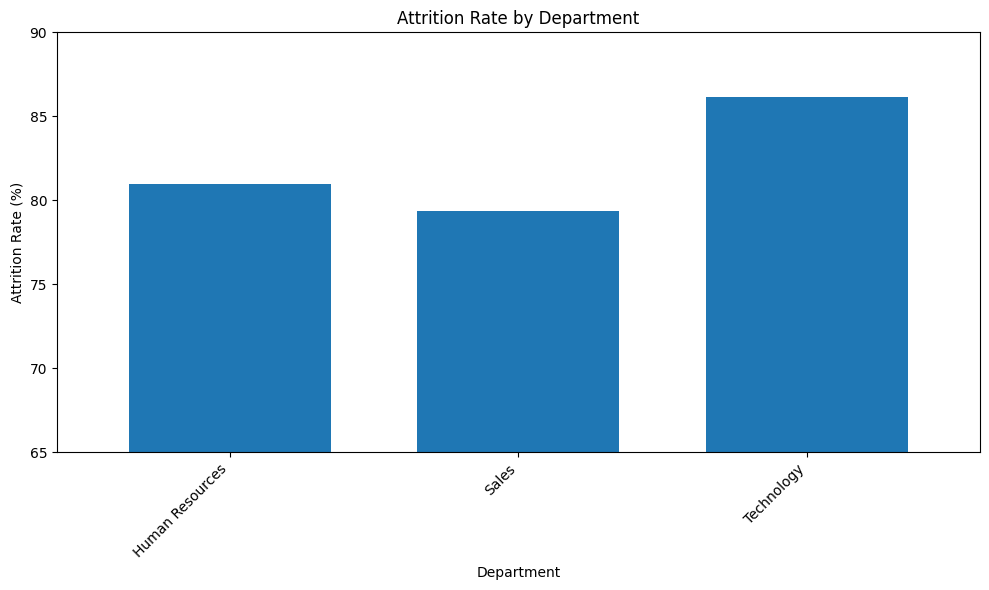

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in 'project (4).xlsx' and the sheet name is 'Employee'
df_dict = pd.read_excel(r"project (4).xlsx", sheet_name=None)
Employee_1 = df_dict['Employee']  # Define Employee_1 here

department_attrition = Employee_1.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100

if 'Yes' in department_attrition.columns and 'No' in department_attrition.columns:
    if pd.api.types.is_numeric_dtype(department_attrition['Yes']) and pd.api.types.is_numeric_dtype(department_attrition['No']):
        plt.figure(figsize=(10, 6))
        ax = department_attrition['No'].plot(kind='bar', width=0.7)
        plt.title('Attrition Rate by Department')
        plt.xlabel('Department')
        plt.ylabel('Attrition Rate (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.ylim(65, 90)
        plt.show()

The chart shows the retention rate of employees in each department.